In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## Random variables

A **random variable** is a numerical representation of a random event. 

### Types of random variables

Due to the nature of random events, they can be discrete or continuous.

- **Discrete random variable**: Can take a countable finite number of distinct values. For example, the number of times heads comes up when flipping a coin 10 times is a discrete random variable, since it can have values such as 0, 1, 2, ..., 10.
- **Continuous random variable**: It can take any value in a continuous interval. For example, the height of a randomly selected person is a continuous random variable because it can be any value within a reasonable range, such as between 50 cm and 250 cm.

Each random variable has an associated **distribution function**, which describes the probability that the random variable will take a specific value (for discrete variables) or fall within a specific interval (for continuous variables).

![random_variable.jpg](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/random_variable.jpg?raw=true)

### Distribution functions

In statistics we represent a distribution of discrete variables through **probability mass functions** (*PMF*). The PMF defines the probability of all possible values of the random variable. In random variables, we represent their distribution by means of the **probability density function** (*PDF*).

#### Probability mass function

It is specific to discrete random variables and gives the probability that the random variable will take a particular value.

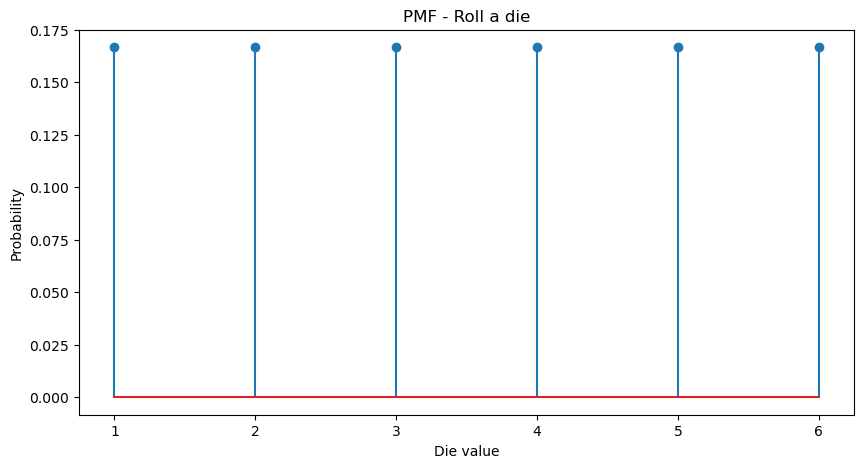

In [219]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(1, 7)
pmf = [1/6 for _ in data]

plt.figure(figsize = (10, 5))
plt.stem(data, pmf)
plt.title("PMF - Roll a die")
plt.xlabel("Die value")
plt.ylabel("Probability")
plt.xticks(data)
plt.show()

In this case we see that the distribution of the random variable is uniform, since its probabilities do not change.

#### Probability density function

It is specific for continuous random variables and is the same as the PMF, but for continuous variables.

In this case we see that the distribution is normal, since the graph faithfully reproduces a Gaussian bell.

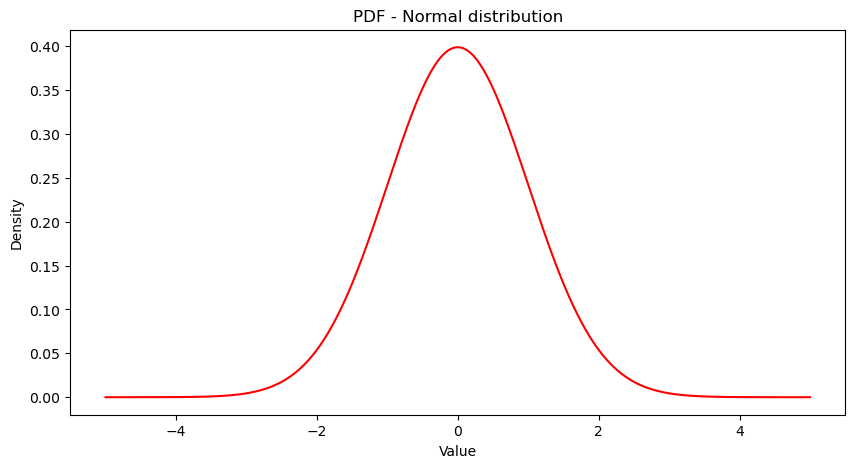

In [222]:
from scipy.stats import norm

data = np.linspace(-5, 5, 1000)
pdf = norm.pdf(data)

plt.figure(figsize = (10, 5))
plt.plot(data, pdf, "r-")
plt.title("PDF - Normal distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

For **continuous distributions**, the probability of drawing *particular* value is zero.

In [263]:
norm.rvs() # From the bell curve distribution, we expect 0 to be the most likely value, right?
# Well... run this until you get zero - exactly. Good luck! ;)

-2.249854044155077

For continuous distributions, we can only speak of the probability of drawing from a *range* of values.

Suppose we have a random variable $X$ and we have a probability distribution function $f(x)$ such as the above.

Then the probability of getting exactly $X$, such as $X=0$ is technically zero...

But we *can* talk about the probability of getting a range of values around zero, say from -0.1 to +0.1.

We will have to use an integral to do this!

$$
\text{Pr}(-0.1 \leq X \leq 0.1) = \int_{-0.1}^{0.1} f(x) dx
$$

Since the probability of returning *something* within the total range is 100% (our distribution must return some value)

Then the *integral* of the *PMF* over the entire range of possible values is 1.

#### Cumulative distribution function

If we want to know the probability of getting a *particular* value or *lower* (probability of getting a value from 0 to the value of interest) then we can use the **cumulative distribution function** (*CDF*).

The CDF can be defined for continuous or discrete probabilities.

To find the CDF of a value $X$ we sum up (or integrate) the probabilities from 0 up to $X$.

For the above Gaussian (aka normal aka Bell Curve) it looks like this:

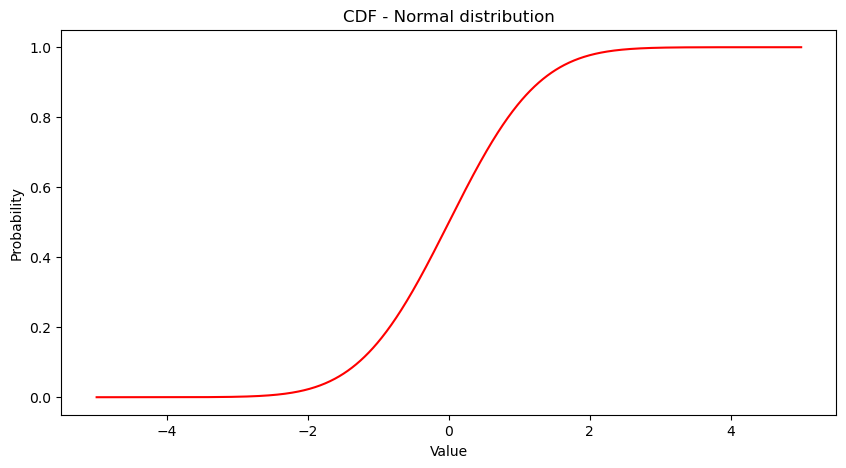

In [265]:
data = np.linspace(-5, 5, 1000)
cdf = norm.cdf(data)

plt.figure(figsize = (10, 5))
plt.plot(data, cdf, "r-")
plt.title("CDF - Normal distribution")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

We can compare the two types of distributions for a Guassian

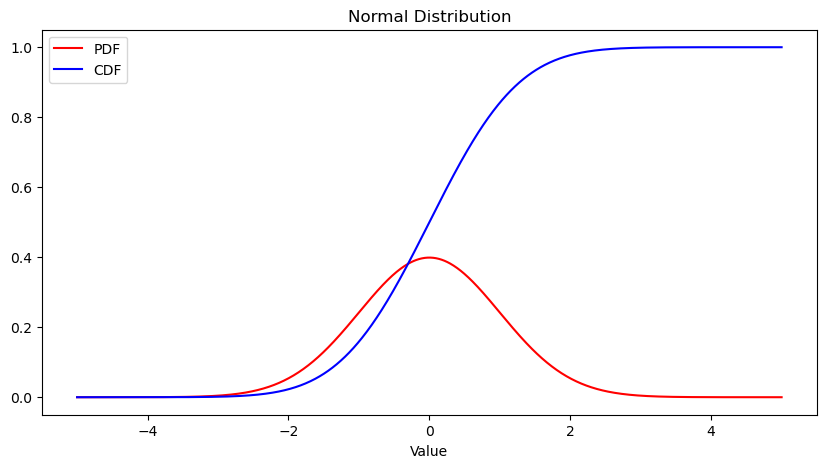

In [268]:
data = np.linspace(-5, 5, 1000)
pdf = norm.pdf(data)
cdf = norm.cdf(data)

plt.figure(figsize = (10, 5))
plt.plot(data, pdf, "r-", label='PDF')
plt.plot(data, cdf, "b-", label='CDF')
plt.xlabel("Value")
plt.legend()
plt.title('Normal Distribution')
plt.show()

In [271]:
#norm.cdf(1) - norm.cdf(-1)

### Probability distributions

### Discrete Distributions

### Bernouli distribution

**Introduction**

https://en.wikipedia.org/wiki/Bernoulli_distribution

A **Bernoulli distribution** shows the probability of a random event which can have **one of two** outcomes. The type of random event is sometimes called a *Bernoulli trial*, so a *Bernoulli distribution* shows the probability of *Bernouli trials*.

Some examples of a *Bernoulli trial* would be

- Flipping a coin. Outcome **heads** vs **tails**

- A Pass/Fail test. Outcome **pass** vs **fail**

Any random event which gives a "Yes" vs "No", or a "True" vs "False", or a "1" vs "0" result can be modeled as a *Bernoulli trial*

We can respresent the two outcomes numerically as either "1" or "0".

We can say that the probability of the outcome being 1 is $p$ and the probability of the outcome being 0 is $1-p$. We can write this more formally as:

$$
\text{Pr}(X=1) = p \\
\text{Pr}(X=0) = 1-p.
$$



**Using `scipy.stats`**

We can use `scipy.stats.bernoulli` to experiment with the Bernoulli distribution, as well as with *many other distributions*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

How this works, for the Bernoulli distribution and others, is the following.

- First import the distribution of interest, such as `bernoulli` from `scipy.stats`.

- Notice that the `bernoulli` distribution has one input, here it is $p$, the probability of a trial returning 1 ('Yes', 'Success' etc.). So to use the `bernoulli` distribuiton, we must input this $p$ value, e.g. `bernoulli(0.1)`

- Notice, that if you just call `bernoulli(p)` it doesn't return a number. Instead what you've done is set up a **class object** which you can then use to grab various values. This is like us "setting up our Bernoulli experiment", but not yet running it. Make sure you save the **class object** to a varible. It can look like this: `dist = bernoulli(p)`

In [2]:
from scipy.stats import bernoulli

In [3]:
p = 0.3

bernoulli(p) #<--- doesn't return a number, but instead a class object. We should save this class object to a variable to use it

In [4]:
dist = bernoulli(p) #<--- like this

After having saved the random distribution as a **class object**, we can now use the functions it has to perform various actions.

If we want to see what functions (methods) we can perform on this distribution, check the "methods" section of the `scipy.stats.rv_discrete` class: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

**Drawing Random Variables**

For example, if we want to draw an "empirical" random variable from this distribuiton, we can use the `.rvs()` function

In [22]:
dist.rvs()

0

We can draw more than one random variable at a time by specifying the `size` paramter

In [30]:
dist.rvs(size=10)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

Text(0, 0.5, 'Number of Times Variable Appears')

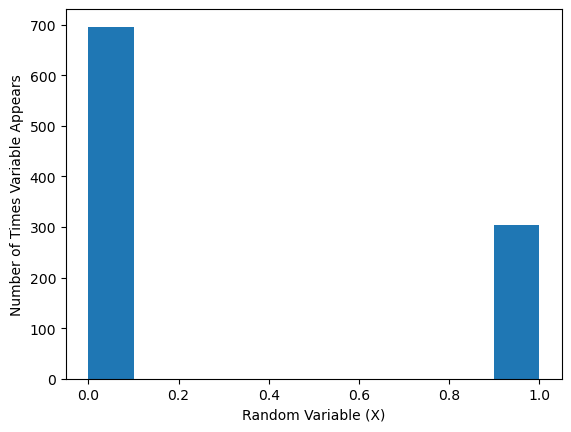

In [42]:
random_sample = dist.rvs(size=1000)

plt.hist(random_sample)
plt.xlabel('Random Variable (X)')
plt.ylabel('Number of Times Variable Appears')

**Descriptive Statistics**

We can also test what the theoretical stats of this distribution are. For example we can find what the **mean** of this distribution would be, the **median**, the **standard deviation**, etc. 

These are theoretical values, we don't need to first draw a distribution to get these. These values are stored in the `dist` class object once we've made it.

In [51]:
dist.mean(), dist.median(), dist.var(), dist.std()

(0.3, 0.0, 0.21, 0.458257569495584)

The `.stats()` also gives us the important statistics of this distribution, the *mean* and the *variance*

In [50]:
dist.stats()

(0.3, 0.21)

For the Bernoulli distribution

The *mean* is the same as the probability, $p$, of a success (1).

$$
\text{mean}(X) = p
$$

The *variance* is the probability, $p$, of a sucess (1) times the probability, $1-p$, of a failure (0).

$$
\text{var}(X) = p (1-p)
$$

In [71]:
dist.mean(), p

(0.3, 0.3)

In [72]:
dist.var(), p*(1-p)

(0.21, 0.21)

**Drawing PMF**

If we want to draw the probability mass function, then we could try to plot a histogram like we did above, and "finagle" it so that all the bars add up to 1.0

But this requires us to draw an array of random numbers. This would be an *empirical* way of making the PMF. 

An alternative is to use the `.pmf()` function.

This finds the *theoretical* probabilities of each possible value

In [66]:
x_values = [0, 1]

pmf = dist.pmf(x_values)

pmf

array([0.7, 0.3])

We can plot the PMF using `plt.bar` or `plt.stem`

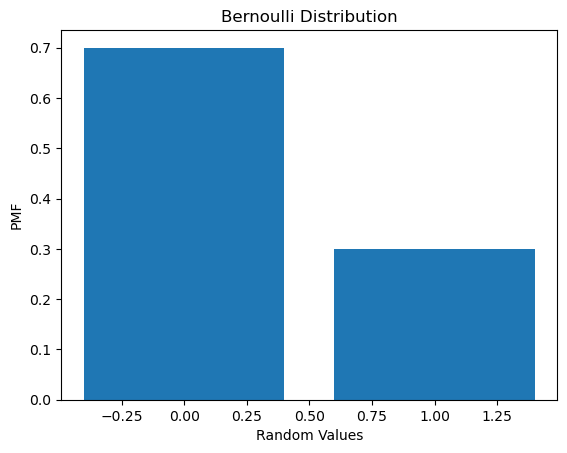

In [69]:
plt.bar(x_values, pmf)
plt.xlabel('Random Values')
plt.ylabel('PMF')
plt.title('Bernoulli Distribution')
plt.show()

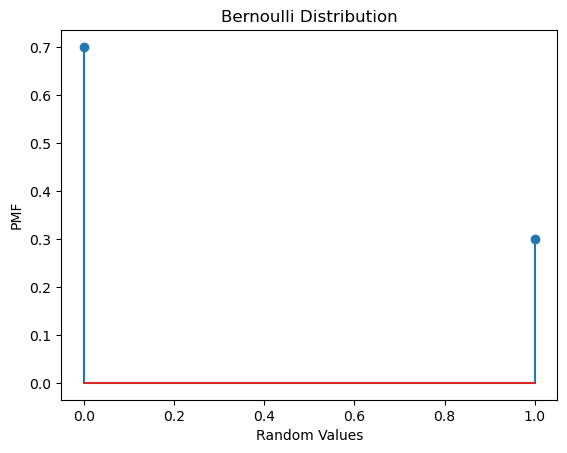

In [70]:
plt.stem(x_values, pmf)
plt.xlabel('Random Values')
plt.ylabel('PMF')
plt.title('Bernoulli Distribution')
plt.show()

### Binomial distribution

If we are simulating multiple *Bernoulli trials* and want to know the probability of recovering a certain number of successful trials, we will use a **binomial distribution**

The binomial distribution is a discrete probability distribution that represents the number of successes in a fixed number of independent Bernoulli trials, where each trial has only two possible outcomes: success (usually denoted as 1) or failure (usually denoted as 0). It's commonly used to model situations where there are a fixed number of independent trials, each with the same probability of success.

If we have $n$ independent Bernoulli trials, each with a probability $p$ of success, then the Bernoulli distribution will tell us the probability of us having $k$ successful trials out of the $n$ simulations.

The probability of having $k$ successful trials from $n$ total trials is given by the following PMF

$$
\text{Pr}(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k}
$$

where ${{n}\choose{k}}$ (read "$n$ choose $k$") is the number of ways we can select $k$ items from a larger collection of $n$ items (where we place the selected item back into the collection each time before drawing again).

It is useful to note that

$$
{{n}\choose{k}} = \frac{n!}{k! (n-k)!},
$$

and $n!$ (read "$n$ factorial") is equal to

$$
n! = n \times (n-1) \times (n-2) \times (n-3) \times \dots \times 1.
$$

E.g. $5! = 5 \times 4 \times 3 \times 2 \times 1 = 120$

**Example with Biased Coin**

Suppose we have a biased coin that lands *heads* (success or 1) with a probability of $p=0.6$ and *tails* (fail or 0) with probability of $1-p=0.4$

A single coin flip would be a *Bernoulli trial* as it has two outcomes (success vs fail) and each trial has the same probability for the outcomes ($p = 0.6$ for success)

If we flip this coin **10 times** and want to ask "What is the probability of getting **3 heads**" then the **binomial distribution** can help us!

In [146]:
# These are our experiment parameters

n = 10  # flip the coin 10 times
p = 0.6 # probability of gettings heads (a success or a 1)

We can do this analytically using the above equation

- First calculate ${{10}\choose{3}}$. This is how many ways the 10 coin flips can give us 3 heads.

- Then multiply this by $p^3$. This is the probability of getting 3 heads

- Then multiply this by $(1-p)$. This is the probabilty of getting 7 tails (7 tails + 3 heads = 10 trials)

In [143]:
from scipy.special import comb

n_k = comb(n, 3)

print(f'There are {n_k} ways of getting 3 heads with 10 coin flips.')

p_heads = p**3

print(f'The probability of the coin landing on heads 3 times is {p_heads:.4f}')

p_tails = (1-p)**(n-3)

print(f'The probability of coin landing on tails 7 times is {p_tails:.4f}')

p_k = n_k * p_heads * p_tails

print()
print(f'The probability of getting 3 heads by flipping the coin 10 times is {p_k:4f}' )

There are 120.0 ways of getting 3 heads with 10 coin flips.
The probability of the coin landing on heads 3 times is 0.2160
The probability of coin landing on tails 7 times is 0.0016

The probability of getting 3 heads by flipping the coin 10 times is 0.042467


**With `scipy.stats`**

If we wanted to confirm this analytically, we could set up multiple experiments each with 10 *bernoulli trials*, and test how many times our experiment returns 3, and only 3 heads. 

Or, we could also use the `scipy.stats.binomial` class to simulate this experiment.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom

In [148]:
from scipy.stats import binom

#n is the number of trials
# p is the probability of success of each trial (already defined in cells above)

dist = binom(n, p) # Our class object for the binomial distribution

**Drawing Random Samples**

We can draw random samples of a binomial experiment using `.rvs()`. 

What does this number signify?

In [180]:
dist.rvs()

8

In [ ]:
#
#

**Drawing the PMF**

We can also draw the PMF of the binomial distribution


The probability of getting 3 heads after flipping the coin 10 times is
0.042467327999999964


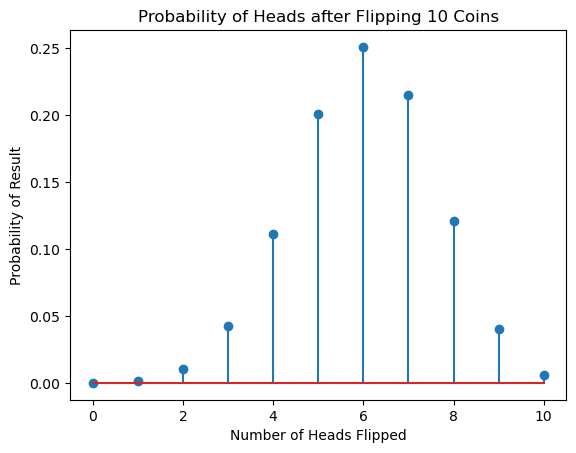

In [209]:
n = 10
p = 0.6 # Change this to see how the distribution changes

dist = binom(n, p)

x_values = np.arange(0, n+1, 1)
pmf = dist.pmf(x_values)

plt.stem(x_values, pmf)
plt.title(f'Probability of Heads after Flipping {n} Coins')
plt.xlabel('Number of Heads Flipped')
plt.ylabel('Probability of Result')

print()
print(f'The probability of getting 3 heads after flipping the coin {n} times is')
print(pmf[x_values==3][0])

0.042467327999999964

The above PMF tells us the probability of getting exactly 3 heads after 10 flips given the probability of each coin giving us heads.

**What if we want to know the probability of getting *at most* 3 heads?**

We would sum up the probability of getting 0 heads, plus the probability of getting 1 head, plus the probability of getting 2 heads, plus the probability of getting 3 heads

In [217]:
n = 10
p = 0.6 # Change this to see how the distribution changes

dist = binom(n, p)

x_values = np.arange(0, n+1, 1)
pmf = dist.pmf(x_values)

print(pmf[0:4])
print(pmf[0:4].sum())

print()
print(f'Probability of getting 3 or fewer heads is {pmf[0:4].sum():.4f}')

[0.00010486 0.00157286 0.01061683 0.04246733]
0.054761881599999965

Probability of getting 3 or fewer heads is 0.0548


We could also plot the cumulative distribution function (CDF) of our binomial distribuiton.

This shows the probability of getting $k$ or *fewer* heads.

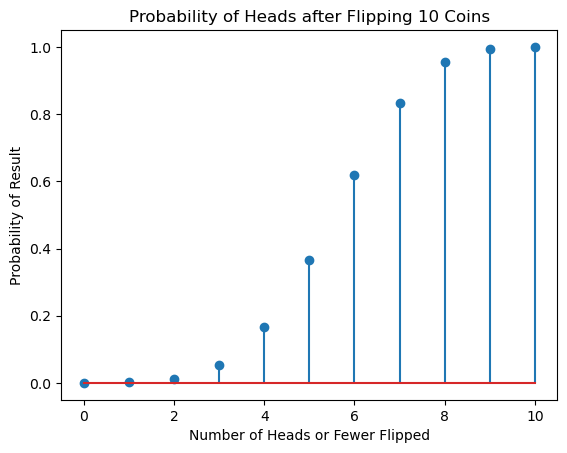

In [274]:
n = 10
p = 0.6 # Change this to see how the distribution changes

dist = binom(n, p)

x_values = np.arange(0, n+1, 1)
pmf = dist.cdf(x_values)

plt.stem(x_values, pmf)
plt.title(f'Probability of Heads after Flipping {n} Coins')
plt.xlabel('Number of Heads or Fewer Flipped')
plt.ylabel('Probability of Result')
plt.show()

### Poisson distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

When we have discrete events which occur throughout a specified time period, and we have a given rate of occurance for the events, then we can use the **Poisson distribution** to describe how many times we will measure the event during the time period.

For example the Poisson distribution can tell us the probability of

- Recieving a given number of calls by a call center in an hour, given the rate of calls (calls per hour)

- Having a given number of earthquakes in a year, given the rate of earthquakes (earthquakes per year)

- etc.

In [286]:
from scipy.stats import poisson

mu = 12.5 # The rate of events per time period e.g. 12.5 calls per hour.

dist = poisson(mu)

In [311]:
dist.rvs() # Drawing random variables

7

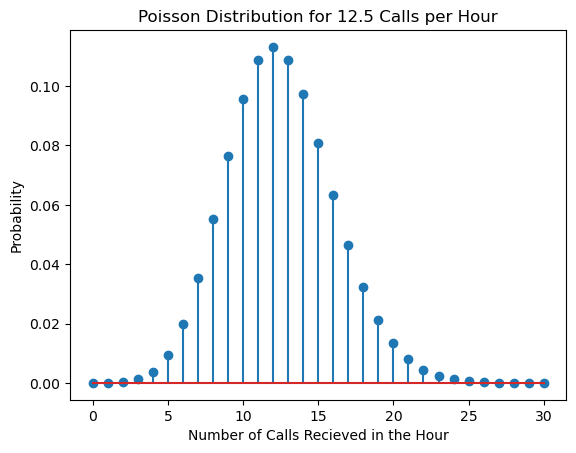

In [319]:
x_values = np.arange(0, 31, 1)

pmf = dist.pmf(x_values)

plt.stem(x_values, pmf)
plt.xlabel('Number of Calls Recieved in the Hour')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution for {mu} Calls per Hour')
plt.show()

### Continuous Distributions

The **normal distribution** applies to continuous random variables and is bell-shaped, hence it is also called Gaussian distribution. It is determined by two parameters: the mean $\mu$  and the standard deviation $\sigma$ . 

Shows up many places in nature, for example...

- The distribution of heights or weights in a large population.

- Blood pressure measurements

- Test scores such as the SAT or GRE

- Measurement errors in an experiment

etc.

In [327]:
from scipy.stats import norm

mean = 0
std  = 1
dist = norm(0,1)

In [330]:
dist.rvs(10) # Draws 10 random samples from a normal distribution

array([-1.4603391 ,  1.44279336,  1.45993509,  0.80081503, -0.42020982,
        1.25819967, -0.98300793, -0.59321011, -0.56585766, -0.64384891])

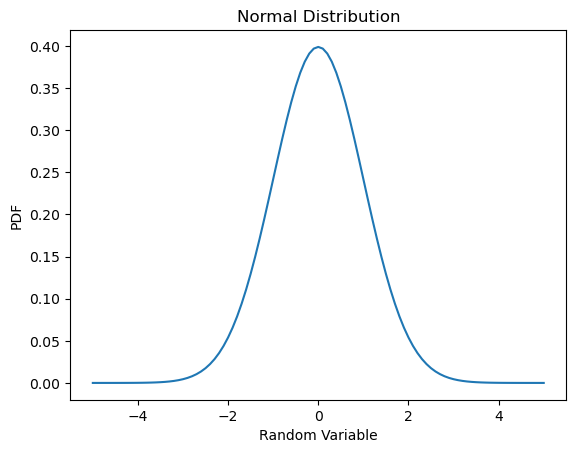

In [348]:
x_values = np.arange(-5, 5+0.1, 0.1)

pdf = dist.pdf(x_values)

plt.plot(x_values, pdf)
plt.xlabel('Random Variable')
plt.ylabel('PDF')
plt.title('Normal Distribution')
plt.show()

What if we want to find the probability of a result being zero?

In [335]:
dist.pdf(0)  #<------ NO!

0.3989422804014327

What if we want to find the probability of a result being between -1 and +1?

Can use the `cdf` function!

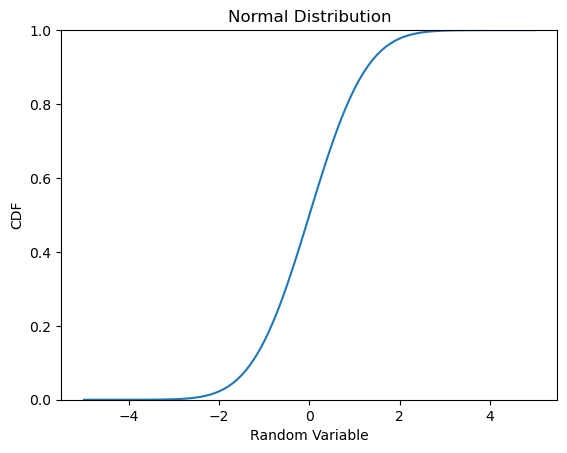

In [356]:
x_values = np.arange(-5, 5+0.1, 0.1)

cdf = dist.cdf(x_values)

plt.plot(x_values, cdf)
plt.ylim(0,1)
plt.xlabel('Random Variable')
plt.ylabel('CDF')
plt.title('Normal Distribution')

#plt.axvline(1, c='C0', ls=':')
#plt.axvline(-1, c='C0', ls=':')

plt.show()

In [358]:
x_lower = -1
x_higher = +1

prob_of_range = dist.cdf(x_higher) - dist.cdf(x_lower)

prob_of_range

0.6826894921370859